###  Нормальный закон распределения

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.special import erf
import scipy.integrate as integrate
import sympy as sp

Непрерывная СВ $\xi$ распределена по нормальному закону с параметрами $\mu$ и $sigma$ $(\xi \in \sim N(\mu, \sigma))$, если ее плотность распределения имеет вид
$$
p_\xi(x)=\frac{1}{\sigma \cdot \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}, \;x\;\in \mathbb{R}
$$

$\int\limits_{-\infty}^{\infty} \frac{1}{\sigma \cdot \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx = 
    \frac{1}{\sigma \cdot \sqrt{2\pi}}\int\limits_{-\infty}^{\infty}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx =
    \frac{\sigma \cdot\sqrt{2}}{\sigma \cdot \sqrt{2\pi}}\int\limits_{-\infty}^{\infty}e^{-\frac{(x-\mu)^2}{2\sigma^2}}d\bigg(\frac{x-\mu}{\sqrt{2}\cdot \sigma} \bigg)= \\
     =\frac{1}{\sqrt{\pi}}\int\limits_{-\infty}^{\infty}e^{-t^2}dt =
     \frac{1}{\sqrt{\pi}} \cdot \ \sqrt{\pi} = 1 \Rightarrow 
     \int\limits_{-\infty}^{0}e^{-t^2}dt  = \frac{\sqrt{\pi}}{2}, 
     \int\limits_{-\infty}^{0}e^{-\frac{z^2}{2}}dz  = 
     \sqrt{\frac{\pi}{2}} = 
     \int\limits_{0}^{\infty}e^{-\frac{z^2}{2}}dz
$     

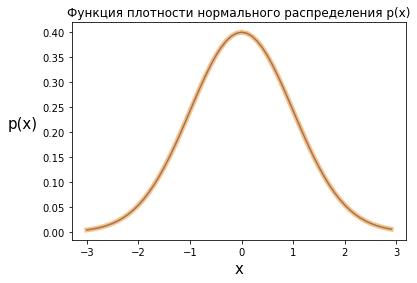

In [43]:
def p(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(sigma**2*2))


xx = np.arange(-3, 3, 0.1)
plt.plot(xx, p(xx, 0, 1))
plt.plot(xx, sts.norm().pdf(xx), alpha=0.5, lw=5)
plt.title('Функция плотности нормального распределения p(x)')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15, rotation=0, labelpad=20)
plt.show()

***Функция распределения***

$$F_\xi(x)=\frac{1}{\sigma \cdot \sqrt{2\pi}}
    \int\limits_{-\infty}^{x} e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx$$

Если $\mu=0, \: \sigma=1$, то такое распределение называется ***стандартным*** и  плотность имеет вид функции Лапласа 
$$\Phi_\xi(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

$
\Phi_\xi(x)= \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x} e^{-\frac{x^2}{2}}dx=
  \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{0} e^{-\frac{x^2}{2}}dx =
  \frac{1}{\sqrt{2\pi}}\int\limits_{0}^{x} e^{-\frac{x^2}{2}}dx =
  \frac{1}{\sqrt{2\pi}} \cdot \sqrt{\frac{\pi}{2}} = \\ \frac{1}{2} + \Phi_0(x)$  $$\Phi_\xi(x) = \frac{1}{2} + \Phi_0(x)$$


$
E_\xi = \int\limits_{-\infty}^{\infty}(x-\mu)^2p(x)dx = \int\limits_{-\infty}^{\infty} \frac{1}{\sigma \cdot \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
$
$
D_\xi = \int\limits_{-\infty}^{\infty}(x-\mu)^2p(x)dx = \int\limits_{-\infty}^{\infty}(x-\mu)^2 \frac{1}{\sigma \cdot \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx = 
    \frac{1}{\sigma \cdot \sqrt{2\pi}} \int\limits_{-\infty}^{\infty} 2\sigma^2 t^2 e^{-t^2} \sqrt{2} \sigma dt = \\
    = \frac{2\sigma^2}{\sqrt{\pi}} \int\limits_{-\infty}^{\infty} t^2 e^{-t^2} dt 
    = \frac{2\sigma^2}{\sqrt{\pi}} \bigg(-\frac{1}{2}te^{-t^2} \bigg|_{-\infty}^{\infty}+\frac{1}{2}\int\limits_{-\infty}^{\infty}e^{-t^2}dt \bigg) = \frac{2\sigma^2}{\sqrt{\pi}} \cdot \frac{1}{2}\sqrt{\pi}=\sigma^2
$

$
E_\xi(x)=\int\limits_{-\infty}^{\infty}x\cdot p(x)dx = \frac{1}{\sigma \cdot \sqrt{2\pi}} \int\limits_{-\infty}^{\infty} x \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx = [subtitute \; t = \frac{(x-\mu)}{2\sigma}] = \\
    \frac{1}{\sigma \cdot \sqrt{2\pi}} 
        \int\limits_{-\infty}^{\infty}(\sqrt{2}t\sigma + \mu) e^{-t^2}\sqrt{2}dt = 
     \frac{\sqrt{2}\sigma}{\sqrt{\pi}} 
         \int\limits_{-\infty}^{\infty}t e^{-t^2}dt +
     \frac{\mu}{\sqrt{\pi}} 
         \int\limits_{-\infty}^{\infty}e^{-t^2}dt = 0 + \frac{\mu}{\sqrt{\pi}} \cdot \sqrt{\pi} = \mu,
$
$
D_\xi = 
 \int\limits_{-\infty}^{\infty}(x-\mu)^2p(x)dx = \int\limits_{-\infty}^{\infty}(x-\mu)^2 \frac{1}{\sigma \cdot \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx = 
    \frac{1}{\sigma \cdot \sqrt{2\pi}} \int\limits_{-\infty}^{\infty} 2\sigma^2 t^2 e^{-t^2} \sqrt{2} \sigma dt = \\
    = \frac{2\sigma^2}{\sqrt{\pi}} \int\limits_{-\infty}^{\infty} t^2 e^{-t^2} dt 
    = \frac{2\sigma^2}{\sqrt{\pi}} \bigg(-\frac{1}{2}te^{-t^2} \bigg|_{-\infty}^{\infty}+\frac{1}{2}\int\limits_{-\infty}^{\infty}e^{-t^2}dt \bigg) = \frac{2\sigma^2}{\sqrt{\pi}} \cdot \frac{1}{2}\sqrt{\pi}=\sigma^2
$

Т.о. $$E_\xi(x)=\mu, \; D_\xi=\sigma^2 \Rightarrow \sigma=\sqrt{D-\xi}$$


Рассмотрим нормальные кривые при различных значениях $\mu$

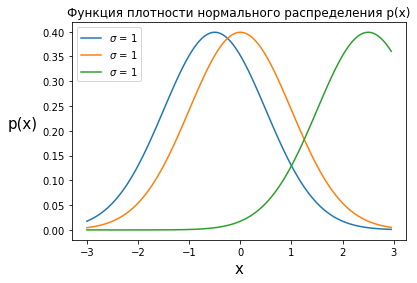

In [52]:
sigma = 1
xx = np.arange(-3, 3, 0.05)

for mu in (-0.5, 0, 2.5):
    
    lb = r'$\sigma$ = {}'.format(sigma)
    plt.plot(xx, p(xx, mu, sigma), label = lb)
#     plt.plot(xx, sts.norm(loc=mu, scale=sigma).pdf(xx), alpha=0.8, label=lb)

plt.title('Функция плотности нормального распределения p(x)')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15, rotation=0, labelpad=20)
plt.legend()
plt.show()

Рассмотрим нормальные кривые при различных значениях $\sigma$

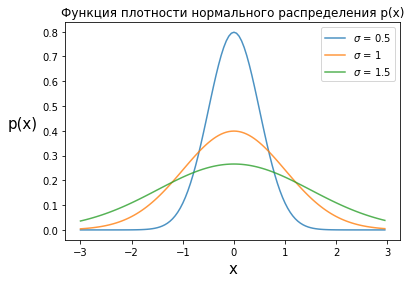

In [53]:
loc = 0
xx = np.arange(-3, 3, 0.05)

for sigma in (0.5, 1, 1.5):
    
    lb = r'$\sigma$ = {}'.format(sigma)
#     plt.plot(xx, p(xx, mu=loc, sigma=sigma), label = lb)
    plt.plot(xx, sts.norm(loc=loc, scale=sigma).pdf(xx), alpha=0.8, label=lb)

plt.title('Функция плотности нормального распределения p(x)')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15, rotation=0, labelpad=20)
plt.legend()
plt.show()

Вероятность попадания СВ $\xi ~ N(\mu, \sigma)$ на заданный участок $(\alpha, \beta)$
$
P\{\alpha < \xi < \beta \} = \frac{1}{\sigma\sqrt{2\pi}} \int\limits_{\alpha}^{\beta}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx = \bigg[ t = \frac{x-\mu}{\sigma}\bigg] 
    = \frac{1}{\sqrt{2\pi}} \int\limits_{\frac{\alpha-\mu}{\sigma}}^{\frac{\beta-\mu}{\sigma}}e^{-\frac{t^2}{2}} dt 
    = \frac{1}{\sqrt{2\pi}} \int\limits_{0}^{\frac{\beta-\mu}{\sigma}}e^{-\frac{t^2}{2}} dt -
    \frac{1}{\sqrt{2\pi}} \int\limits_{0}^{\frac{\alpha-\mu}{\sigma}}e^{-\frac{t^2}{2}}dt \Rightarrow
$

$$P\{\alpha < \xi < \beta \} = \Phi_0\bigg(\frac{\beta-\mu}{\sigma}\bigg)-\Phi_0\bigg(\frac{\alpha-\mu}{\sigma}\bigg),$$
где $\Phi_0=\frac{1}{\sqrt{2\pi}} \int\limits_{0}^{x}e^{-\frac{t^2}{2}}dt$ - функция Лапласа

Через функцию Лапласа $\Phi_0(x)$ выражается также функция распределения $F(x)$ нормально распределенной СВ $\xi$

$
F_\xi(x)= P\{\infty < \xi < x \} = \frac{1}{\sigma\sqrt{2\pi}} \int\limits_{-\infty}^{x}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx =
    \Phi_0\bigg(\frac{x-\mu}{\sigma}\bigg)-\Phi_0\bigg(\frac{-\infty-\mu}{\sigma}\bigg)=\Phi_0\bigg(\frac{x-\mu}{\sigma}\bigg)+\frac{1}{2}, т.е.
$
$$ F_\xi(x)=\frac{1}{2}+\Phi_0\bigg(\frac{x-\mu}{\sigma}\bigg)$$
Рассмотрим вероятность наступления события на интервале $(\mu-l, \mu+l)$:

$
P\{\mu-l <\xi <\mu+l\} = P\{|\xi-\mu|<l\} = \Phi_0\bigg(\frac{\mu+l-\mu}{\sigma}\bigg)-\Phi_0\bigg(\frac{\mu-l-\mu}{\sigma}\bigg)=
    2\Phi_0\bigg(\frac{l}{\sigma}\bigg)$, т.е.
$$P\{|\xi-\mu|<l\} = 2\Phi_0\bigg(\frac{l}{\sigma}\bigg) = 
    2\Phi\bigg(\frac{l}{\sigma}\bigg)-1$$
    
***Задача 1*** Пусть $l=3\sigma \Rightarrow P\{|\xi-\mu|\}<3\sigma=2\Phi_0(3)$

Решение с помощью библиотеки sympy

In [148]:
t = sp.Symbol('t')
laplace = (1/(sp.sqrt(sp.pi*2)))*sp.exp(-(t**2/2))
print('Функция лапалса со значением в точке 0.1:')
display(sp.Eq(laplace, sp.lambdify(t, laplace)(0.1)))


Phi = sp.integrate(laplace, (t, 0.0, t))
P = sp.lambdify(t, Phi)(3)*2

print('вероятность попадания нормально распределенной случайной ', end='')
print(f'величины в интервал от-3 сигмы до +3 сигмы относительно центра рассения  ', end='')
print(f'равен {round(P, 4)}, т.е. событие практически достоверное (правило 3х сигм)')

Функция лапалса со значением в точке 0.1:


Eq(sqrt(2)*exp(-t**2/2)/(2*sqrt(pi)), 0.396952547477012)

вероятность попадания нормально распределенной случайной величины в интервал от-3 сигмы до +3 сигмы относительно центра рассения  равен 0.9973, т.е. событие практически достоверное (правило 3х сигм)


Решение с помощью функции ошибки библотеки **scipy** , где 

$
erf(x)=\frac{2}{\sqrt{\pi}} \int\limits_{0}^{x} e^{-t^2}dt  \Rightarrow
    \Phi_0(x) = [t=\frac{u}{\sqrt{2}}, \; dt = \frac{1}{\sqrt{2}}du] 
= (\frac{2}{\sqrt{2\pi}}\int\limits_{0}^{z}e^{-\frac{u^2}{2}}du) \cdot \frac{1}{2} \Rightarrow \\ 
\boxed{\Phi_0(x)= \frac{1}{2} erf \bigg(\frac{x}{\sqrt{2}}\bigg)} 
    \Rightarrow lambda \; x: erf(\frac{x}{\sqrt{2}})/2
$


 

In [92]:
# Решение методами SCIPY scipy.special.erf

Ph = lambda x: erf(x/2**0.5)/2
2*Ph(3)

0.9973002039367398

In [149]:
mu, sigma = 0, 1

norm = sts.norm(loc=mu, scale=sigma)
print(norm.cdf(3)-norm.cdf(-3))
norm.interval(0.9973002039367398)


0.9973002039367398


(-2.9999999999999982, 2.9999999999999982)

При измерении детали получаются случайные ошибки, подчиненные нормальному закону с параметром $\sigma=10$ мм. Производится 3 независимых измерения детали. Найти вероятность того, что ошибка хотя бы одного измерения не превосходит по модулю 2 мм.

In [150]:
mu, sigma = 0, 10
rv = sts.norm(loc=mu, scale=sigma)
xx = np.arange(-20, 20)
p1, p_1 = 1-(rv.cdf(2)-rv.cdf(-2)), rv.cdf(-2)+rv.sf(2)
print(p1, p_1)
p3 = 1 - p1**3
print('вероятность того, что ошибка хотя бы одного измерения не превосходит по модулю 2 мм равна {}'.format(round(p3, 4)))

0.841480581121794 0.8414805811217939
вероятность того, что ошибка хотя бы одного измерения не превосходит по модулю 2 мм равна 0.4042
